## CLASS ON 20-04-24

# A CASE STUDY : DIAMOND PRICE PREDICTION USING ML PIPELINES AND COLUMN TRANSFORM

    PIPELINES AND COLUMN TRANSFORMS ARE USED BECAUSE
    - CODE REDABULITY
    - MORE EFFICIENT
    - CODE READABILITY
    - NO NEED TO WRITE SEPERATE CODE FOR TRAIN AND TEST

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"data\diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


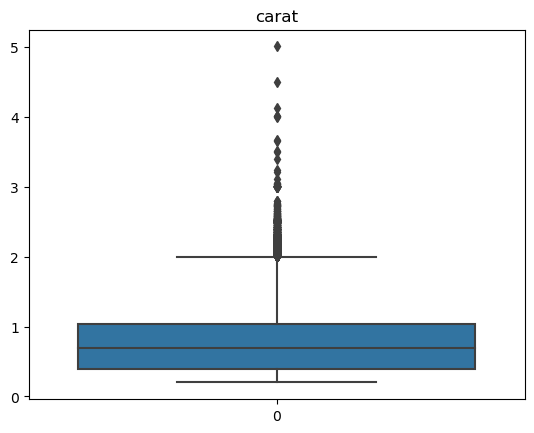

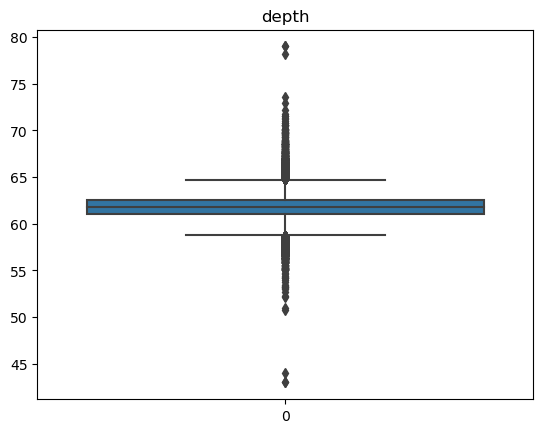

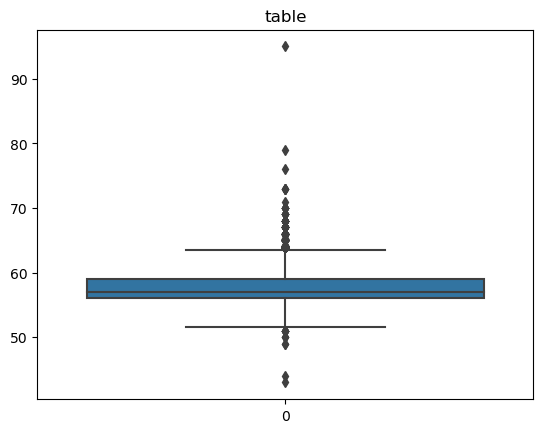

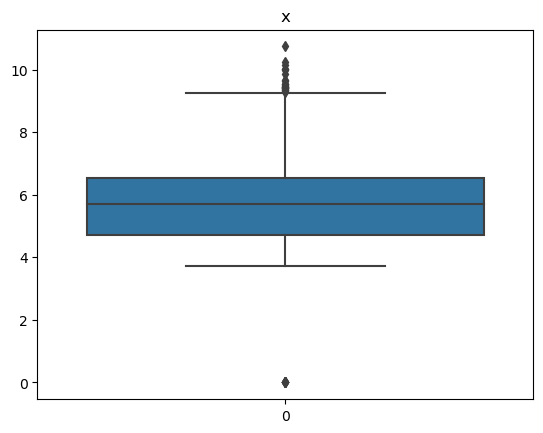

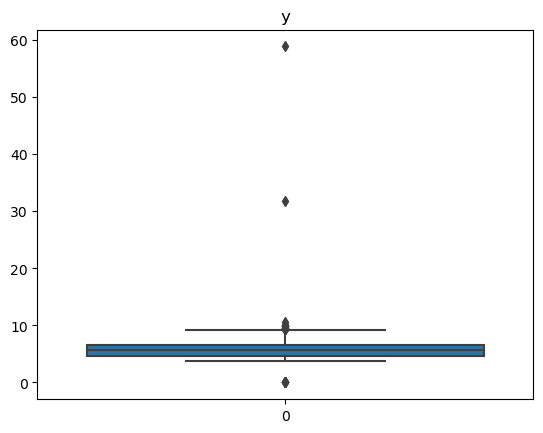

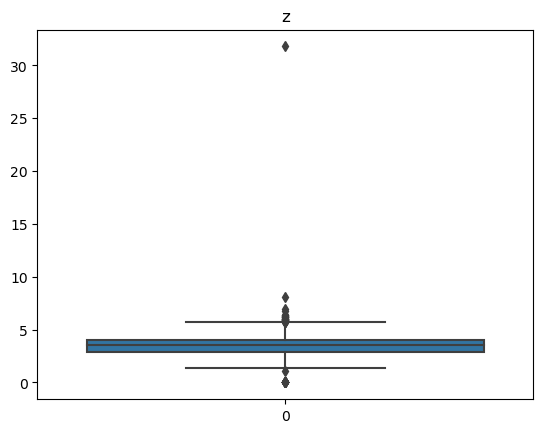

In [7]:
for i in df.select_dtypes(include="float64").columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [8]:
df.drop("price",axis=1)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [9]:
x = df.drop("price",axis=1)
y = df["price"]

In [10]:
x.shape, y.shape

((53940, 9), (53940,))

In [11]:
cont_cols = x.select_dtypes(exclude = "object").columns
cat_cols = x.select_dtypes(include = "object").columns

In [12]:
cont_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [13]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [29]:
cont_pl = Pipeline(steps = [("Scaling",RobustScaler()),
                           ("Power Transformation",PowerTransformer())])

In [30]:
cat_nominal_pl = Pipeline(steps = [("Nominal Encoding",OneHotEncoder(drop = 'first',sparse_output=False))])

In [31]:
cat_ordinal_pl = Pipeline(steps = [("Ordinal Encoding", OrdinalEncoder())])

In [32]:
ct = ColumnTransformer(transformers = [("Continuous transformer",cont_pl,cont_cols.values),
                                      ("Cat Nominal transformer",cat_nominal_pl,["color","clarity"]),
                                      ("Cat Ordinal transformer",cat_ordinal_pl,["cut"])]) #remainder="passthrough"

In [33]:
ct

ColumnTransformer(transformers=[('Continuous transformer',
                                 Pipeline(steps=[('Scaling', RobustScaler()),
                                                 ('Power Transformation',
                                                  PowerTransformer())]),
                                 array(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype=object)),
                                ('Cat Nominal transformer',
                                 Pipeline(steps=[('Nominal Encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['color', 'clarity']),
                                ('Cat Ordinal transformer',
                                 Pipeline(steps=[('Ordinal Encoding',
                                                  OrdinalEncoder())]),
                                 ['cut'])])

In [34]:
final_pl = Pipeline(steps=[("final_ct",ct),
                         ("Model-LR",LinearRegression())])

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30, random_state = 100)

In [36]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((37758, 9), (16182, 9), (37758,), (16182,))

In [37]:
final_pl.fit(xtrain,ytrain)

Pipeline(steps=[('final_ct',
                 ColumnTransformer(transformers=[('Continuous transformer',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler()),
                                                                  ('Power '
                                                                   'Transformation',
                                                                   PowerTransformer())]),
                                                  array(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype=object)),
                                                 ('Cat Nominal transformer',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['color', 'clarity']),
                                                 ('Cat Ordinal transformer',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  ['cut'])])),
                ('Model-LR', LinearRegression())])

In [38]:
final_pl.predict(xtest)

array([2909.39360012, 8364.80444866, 1001.73546882, ..., 1847.22823054,
        673.20835363, 4759.09379588])

## Create a pickle file

In [39]:
import pickle

In [40]:
pickle.dump(final_pl,open("estimator.pkl",'wb'))

In [41]:
import os
os.getcwd()

'C:\\Users\\vijay\\Desktop\\ML\\STREAMLIT_CLASSES'

In [42]:
predict = pickle.load(open("estimator.pkl",'rb'))

In [ ]:
predict.predict([''])